# Lab 1: Real-World Data Cleaning, Transformation and Visualization

In [54]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
# Load dataset:
dataset=sns.load_dataset("titanic")
df=pd.DataFrame(dataset)

# Initial dataset shape
df.shape
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [34]:
# Identify missing values
df.isnull().sum().sort_values(ascending=True)

survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
embarked         2
embark_town      2
age            177
deck           688
dtype: int64

In [35]:
# Use the mean method in cleaning data
clean_df=df
clean_df["age"]=df["age"].fillna(df["age"].mean())

# Use most frequently occuring feature
df.mode()

clean_df["embarked"].fillna("S",inplace=True);
clean_df["deck"].fillna("C",inplace=True);
clean_df["embark_town"].fillna("Southampton",inplace=True);
clean_df.shape

(891, 15)

In [36]:
# normalize data
scaled_data=clean_df
scaler=MinMaxScaler();
scaled_data["fare"]=scaler.fit_transform(scaled_data[["fare"]])

# Log_scale
np.seterr(divide= 'ignore')
log_scale=np.log(scaled_data["fare"])


In [37]:
# Feature engineering
scaled_data["Family_Size"]=scaled_data["sibsp"]+scaled_data["parch"]


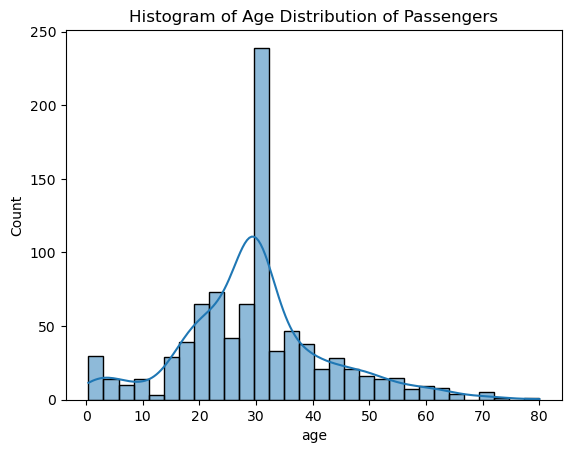

In [38]:
# Histogram of the age distribution of passengers
plt.title("Histogram of Age Distribution of Passengers");
age_distribution=sns.histplot(scaled_data["age"],kde=True)
plt.show()

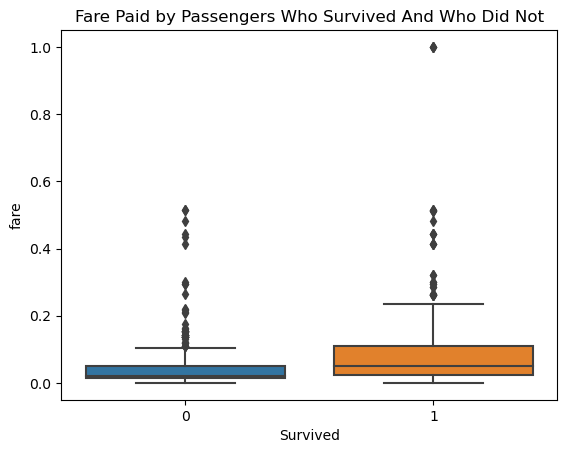

In [39]:
#Box plot to compare fares
plt.title("Fare Paid by Passengers Who Survived And Who Did Not");
sns.boxplot(data=scaled_data, x="survived",y="fare")
plt.xlabel("Survived");


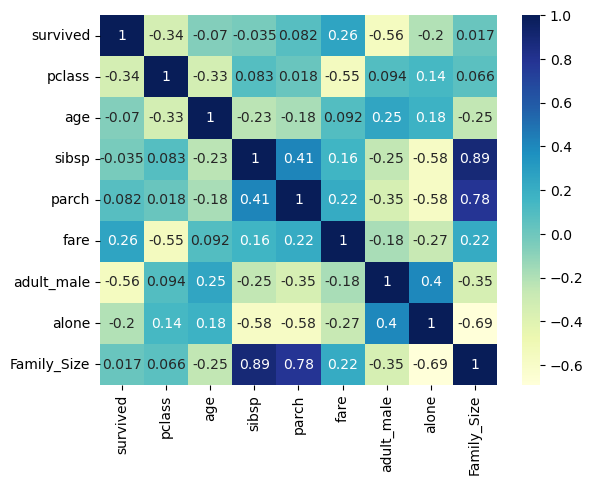

In [52]:
# Heatmap
sns.heatmap(scaled_data.corr(numeric_only=True),annot=True, cmap="YlGnBu")
plt.show()

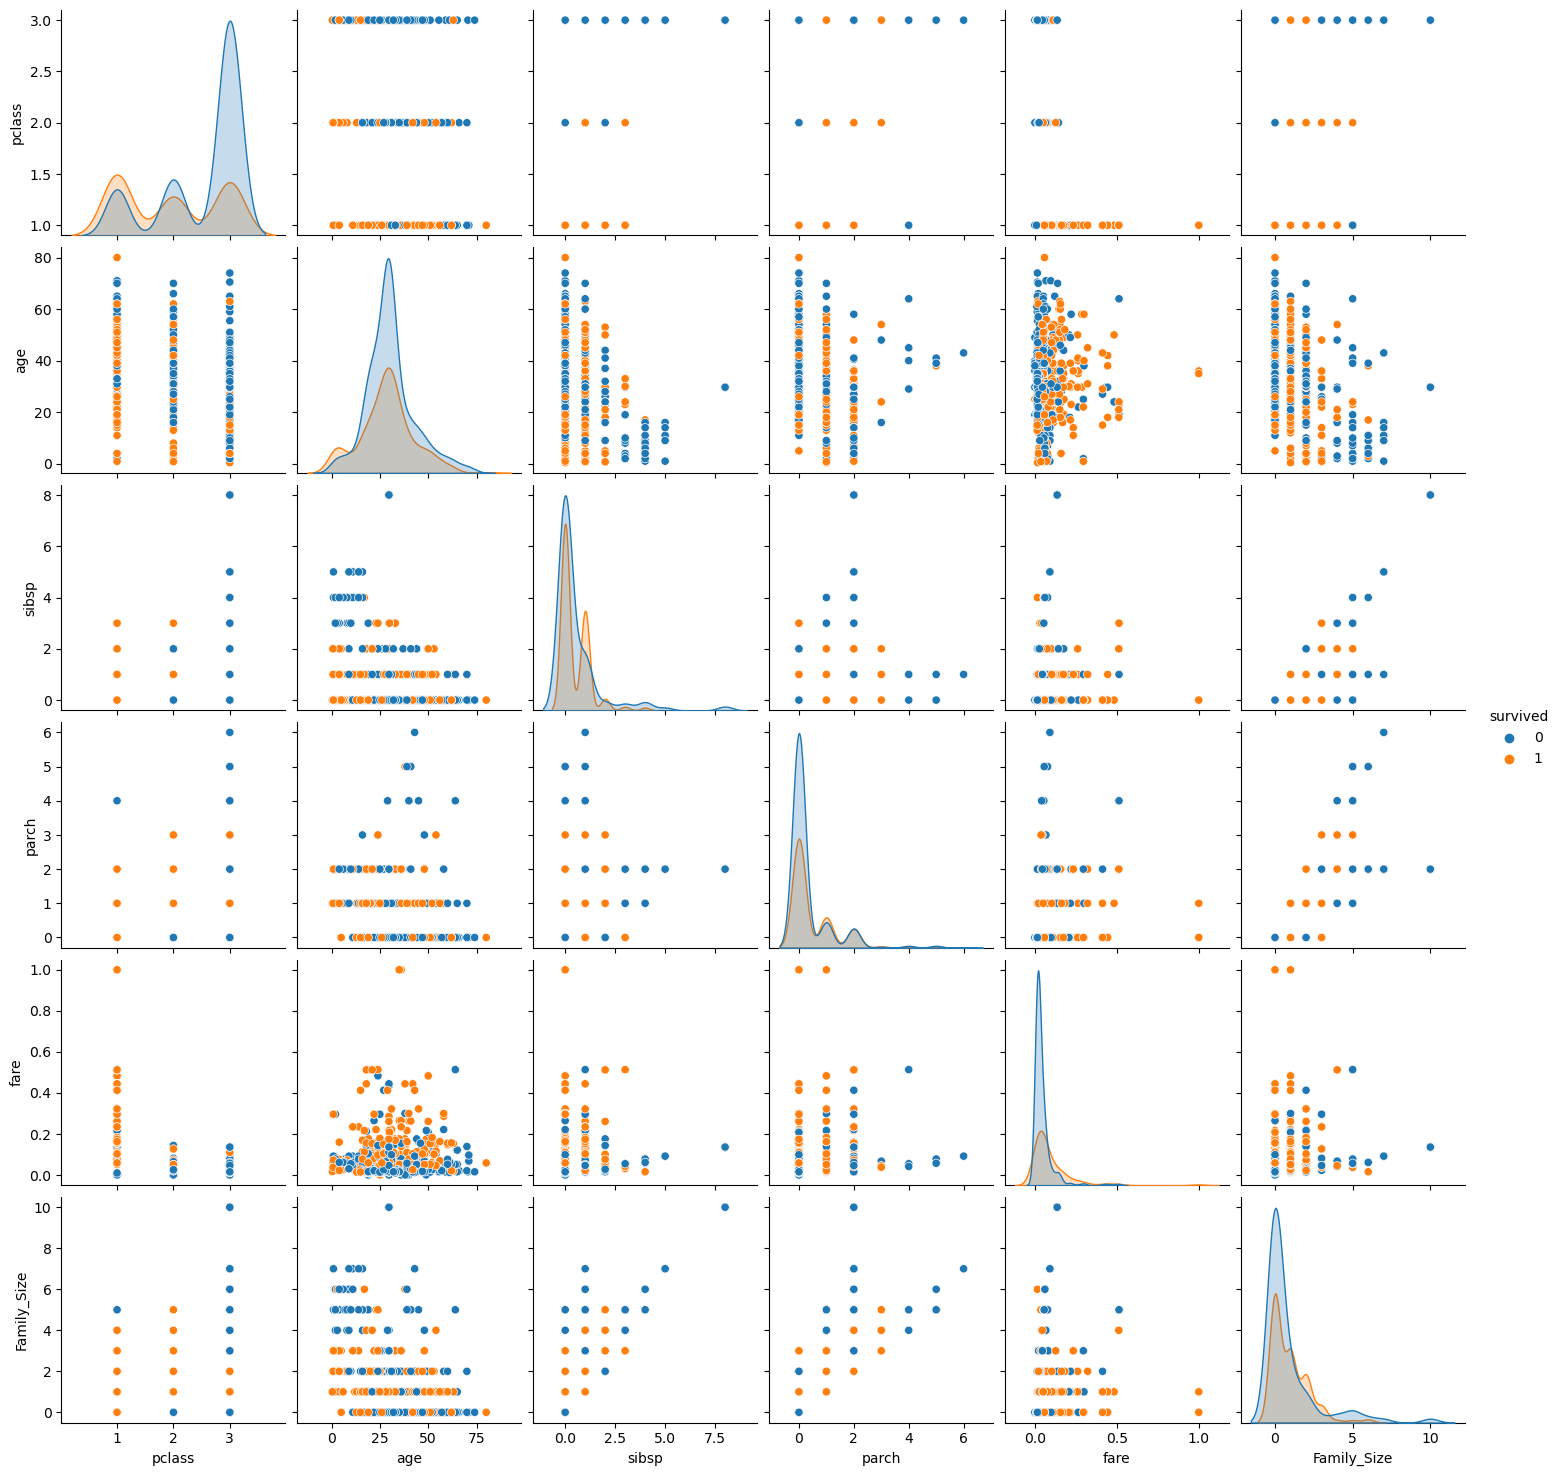

In [55]:
# Pair Plot
sns.pairplot(scaled_data.select_dtypes(['number']),hue="survived")
plt.show()